In [110]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns
import numpy as np
import random
sns.set_style('white')

%matplotlib inline

In [63]:
# Load raw data into DataFrame using pandas
road_features_df_raw = pd.read_csv('Road_features.csv', delimiter=',')

In [64]:
#replace NaN with 0
road_features_df = road_features_df_raw[~(road_features_df_raw['State'] == 'Total ')].fillna(0)

In [65]:
road_features_df.head()

,SNo,State,SingleLane-Accident-2014,SingleLane-Killed-2014,SingleLane-Injured-2014,TwoLanes-Accident-2014,TwoLanes-Killed-2014,TwoLanes-Injured-2014,3LanesOrMoreW.OMedian-Accident-2014,3LanesOrMoreW.OMedian-Killed-2014,3LanesOrMoreW.OMedian-Injured-2014,4LanesWithMedian-Accident-2014,4LanesWithMedian-Killed-2014,4LanesWithMedian-Injured-2014
0,1,Andhra Pradesh,8634.0,2958.0,13541.0,10327.0,2994.0,10122.0,1188.0,396.0,1199.0,4291.0,1560.0,5069.0
1,2,Arunachal Pradesh,90.0,60.0,152.0,115.0,59.0,156.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Assam,3888.0,1217.0,3195.0,2432.0,1035.0,2510.0,56.0,25.0,42.0,768.0,245.0,752.0
3,4,Bihar,3731.0,1815.0,2475.0,4156.0,2096.0,3092.0,756.0,390.0,485.0,913.0,612.0,588.0
4,5,Chhattisgarh,7961.0,2244.0,7762.0,4696.0,1524.0,4661.0,0.0,0.0,0.0,1164.0,254.0,734.0


In [66]:
road_features_df.tail()

,SNo,State,SingleLane-Accident-2014,SingleLane-Killed-2014,SingleLane-Injured-2014,TwoLanes-Accident-2014,TwoLanes-Killed-2014,TwoLanes-Injured-2014,3LanesOrMoreW.OMedian-Accident-2014,3LanesOrMoreW.OMedian-Killed-2014,3LanesOrMoreW.OMedian-Injured-2014,4LanesWithMedian-Accident-2014,4LanesWithMedian-Killed-2014,4LanesWithMedian-Injured-2014
31,32,Dadra & Nagar Haveli,21.0,15.0,28.0,66.0,44.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0
32,33,Daman & Diu,13.0,5.0,11.0,26.0,10.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0
33,34,Delhi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,35,Lakshadweep,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,36,Puducherry,525.0,43.0,393.0,567.0,108.0,930.0,0.0,0.0,0.0,19.0,0.0,0.0


In [67]:
#print(road_features_df)
road_features_df[['State','SingleLane-Accident-2014']][:2]

,State,SingleLane-Accident-2014
0,Andhra Pradesh,8634.0
1,Arunachal Pradesh,90.0


In [68]:
print(np.sum(road_features_df['SingleLane-Accident-2014']))
print(np.mean(road_features_df['SingleLane-Accident-2014']))

207725.0
5770.13888889


In [70]:
# Replacing NaN with 0
single_lane_killed_2014 = road_features_df[['State','SingleLane-Killed-2014']].fillna(0)

In [9]:
single_lane_killed_2014.tail(5)

,State,Single Lane-Killed-2014
31,Dadra & Nagar Haveli,15.0
32,Daman & Diu,5.0
33,Delhi,0.0
34,Lakshadweep,0.0
35,Puducherry,43.0


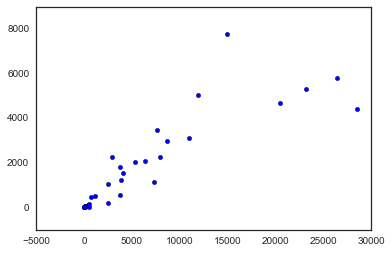

In [72]:
# Just to test scatter plotting
plt.scatter(road_features_df['SingleLane-Accident-2014'].tolist(), road_features_df['SingleLane-Killed-2014'].tolist())

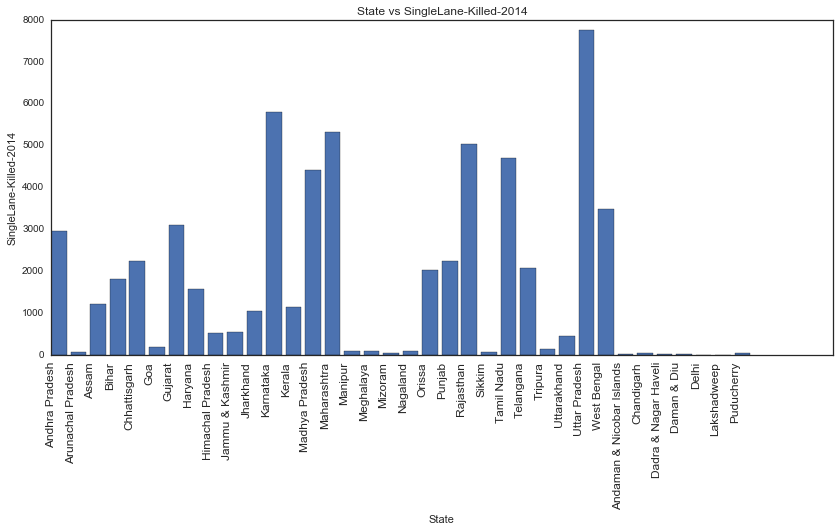

In [75]:
plt.figure(figsize=(14, 6))
y_pos = np.arange(len(road_features_df['State']))
plt.bar(y_pos, road_features_df['SingleLane-Killed-2014'])
plt.xticks(y_pos, road_features_df['State'], rotation=90, fontsize='large')
plt.xlabel('State')
plt.ylabel('SingleLane-Killed-2014')
plt.title('State vs SingleLane-Killed-2014')

In [76]:
#Experiment with sorting
#sort() is deprecated, use sort_values()
#[[]] indicates it is list of list
#single_lane_killed_2014 = road_features_df[['Single Lane-Killed-2014']]
single_lane_killed_2014 = road_features_df[['State', 'SingleLane-Killed-2014']]
sorted_single_lane_killed_2014 = single_lane_killed_2014.sort_values(['SingleLane-Killed-2014'], ascending=[False])
sorted_single_lane_killed_2014.head()

,State,SingleLane-Killed-2014
27,Uttar Pradesh,7770.0
11,Karnataka,5804.0
14,Maharashtra,5312.0
21,Rajasthan,5035.0
23,Tamil Nadu,4693.0


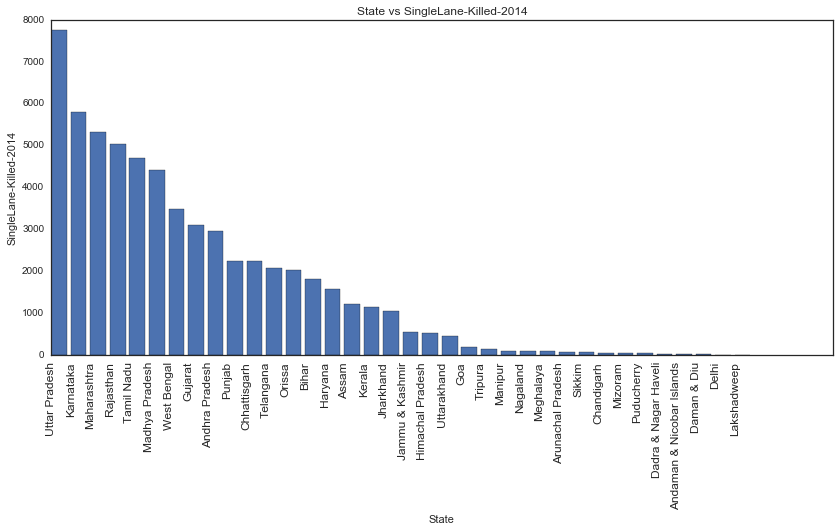

In [77]:
plt.figure(figsize=(14, 6))
single_lane_killed_2014 = road_features_df[['State', 'SingleLane-Killed-2014']]
sorted_df = single_lane_killed_2014.sort_values(['SingleLane-Killed-2014'], ascending=[False])
y_pos = np.arange(len(sorted_df['State']))
plt.bar(y_pos, sorted_df['SingleLane-Killed-2014'])
plt.xticks(y_pos, sorted_df['State'], rotation=90, fontsize='large')
plt.xlabel('State')
plt.ylabel('SingleLane-Killed-2014')
plt.title('State vs SingleLane-Killed-2014')

In [79]:
#Sample df for testing
sample_df = road_features_df[['State', 'SingleLane-Accident-2014', 'TwoLanes-Accident-2014']]
sample_df.head()

,State,SingleLane-Accident-2014,TwoLanes-Accident-2014
0,Andhra Pradesh,8634.0,10327.0
1,Arunachal Pradesh,90.0,115.0
2,Assam,3888.0,2432.0
3,Bihar,3731.0,4156.0
4,Chhattisgarh,7961.0,4696.0


In [80]:
#Melting experiment
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html
pd.melt(sample_df, id_vars=['State'], value_vars=['SingleLane-Accident-2014']).head()

,State,variable,value
0,Andhra Pradesh,SingleLane-Accident-2014,8634.0
1,Arunachal Pradesh,SingleLane-Accident-2014,90.0
2,Assam,SingleLane-Accident-2014,3888.0
3,Bihar,SingleLane-Accident-2014,3731.0
4,Chhattisgarh,SingleLane-Accident-2014,7961.0


In [84]:
#Impact of Lanes on Accidents
lanes_vs_accidents_df = pd.melt(road_features_df, id_vars=['State'], value_vars=['SingleLane-Accident-2014','TwoLanes-Accident-2014','3LanesOrMoreW.OMedian-Accident-2014','4LanesWithMedian-Accident-2014'])
lanes_vs_accidents_df.columns = ['State','NoOfLane','AccidentCount']
lanes_vs_accidents_df.head()

,State,NoOfLane,AccidentCount
0,Andhra Pradesh,SingleLane-Accident-2014,8634.0
1,Arunachal Pradesh,SingleLane-Accident-2014,90.0
2,Assam,SingleLane-Accident-2014,3888.0
3,Bihar,SingleLane-Accident-2014,3731.0
4,Chhattisgarh,SingleLane-Accident-2014,7961.0


In [86]:
#Group lane wise accidents counts by state
lanes_vs_accidents_grp = lanes_vs_accidents_df.groupby(['State','NoOfLane']).sum()
lanes_vs_accidents_grp.head()

AccidentCount
State                     NoOfLane                                          
Andaman & Nicobar Islands 3LanesOrMoreW.OMedian-Accident-2014            1.0
                          4LanesWithMedian-Accident-2014                 3.0
                          SingleLane-Accident-2014                      99.0
                          TwoLanes-Accident-2014                       115.0
Andhra Pradesh            3LanesOrMoreW.OMedian-Accident-2014         1188.0

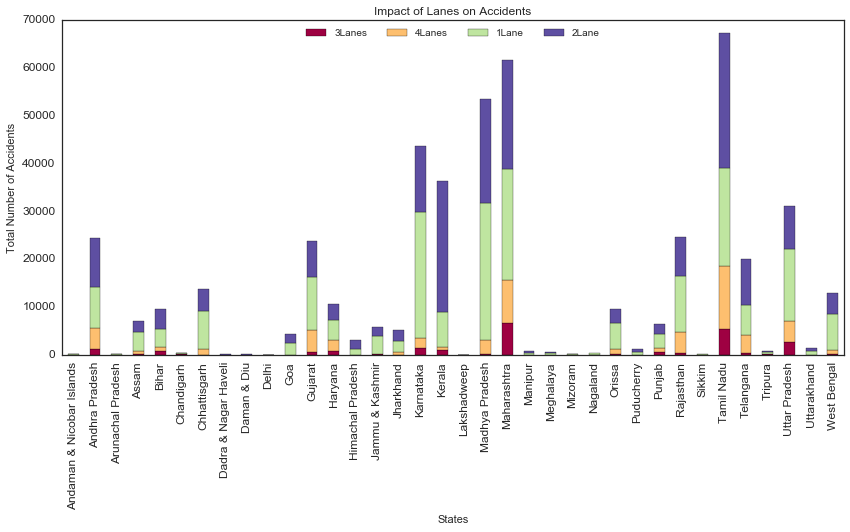

In [113]:
#Visualize accident counts for each state - Lane wise accident counts should be stacked up
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
lanes_plot = lanes_vs_accidents_grp.unstack().plot(figsize=(14,6), kind='bar',stacked=True,title="Impact of Lanes on Accidents", fontsize='large', cmap=cmap)
lanes_plot.set_xlabel("States")
lanes_plot.set_ylabel("Total Number of Accidents")
lanes_plot.legend(["3Lanes","4Lanes","1Lane","2Lane"], loc=9,ncol=4)

In [99]:
#Impact of Lanes on Number of Persons Killed
lanes_vs_killed_df = pd.melt(road_features_df, id_vars=['State'], value_vars=['SingleLane-Killed-2014','TwoLanes-Killed-2014','3LanesOrMoreW.OMedian-Killed-2014','4LanesWithMedian-Killed-2014'])
lanes_vs_killed_df.columns = ['State','NoOfLane','KilledCount']
lanes_vs_killed_df.head()

,State,NoOfLane,KilledCount
0,Andhra Pradesh,SingleLane-Killed-2014,2958.0
1,Arunachal Pradesh,SingleLane-Killed-2014,60.0
2,Assam,SingleLane-Killed-2014,1217.0
3,Bihar,SingleLane-Killed-2014,1815.0
4,Chhattisgarh,SingleLane-Killed-2014,2244.0


In [100]:
#Group lane wise accidents counts by state
lanes_vs_killed_grp = lanes_vs_killed_df.groupby(['State','NoOfLane']).sum().sort_values(['KilledCount'], ascending=[False])
lanes_vs_killed_grp.head()

,,KilledCount
State,NoOfLane,
Uttar Pradesh,SingleLane-Killed-2014,7770.0
Tamil Nadu,TwoLanes-Killed-2014,6731.0
Karnataka,SingleLane-Killed-2014,5804.0
Maharashtra,SingleLane-Killed-2014,5312.0
Rajasthan,SingleLane-Killed-2014,5035.0


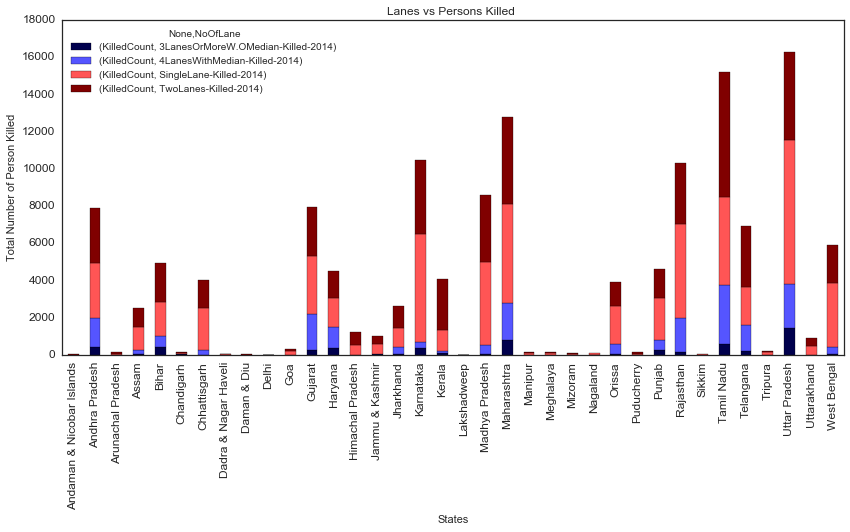

In [120]:
#Visualize number of persons killed for each state
cmap = cm.get_cmap('seismic') # Colour map (there are many others)
lanes_plot = lanes_vs_killed_grp.unstack().plot(figsize=(14,6), kind='bar',stacked=True,title="Lanes vs Persons Killed ", fontsize='large', cmap=cmap)
lanes_plot.set_xlabel("States")
lanes_plot.set_ylabel("Total Number of Person Killed")

#ToDo
#Why can't we see any effect of sorting the points?

In [103]:
#Impact of Lanes on Number of Persons Injured
lanes_vs_injured_df = pd.melt(road_features_df, id_vars=['State'], value_vars=['SingleLane-Injured-2014','TwoLanes-Injured-2014','3LanesOrMoreW.OMedian-Injured-2014','4LanesWithMedian-Injured-2014'])
lanes_vs_injured_df.columns = ['State','NoOfLane','InjuredCount']
lanes_vs_injured_df.head()

,State,NoOfLane,InjuredCount
0,Andhra Pradesh,SingleLane-Injured-2014,13541.0
1,Arunachal Pradesh,SingleLane-Injured-2014,152.0
2,Assam,SingleLane-Injured-2014,3195.0
3,Bihar,SingleLane-Injured-2014,2475.0
4,Chhattisgarh,SingleLane-Injured-2014,7762.0


In [104]:
#Group lane wise accidents counts by state
lanes_vs_injured_grp = lanes_vs_injured_df.groupby(['State','NoOfLane']).sum().sort_values(['InjuredCount'], ascending=[False])
lanes_vs_injured_grp.head()

,,InjuredCount
State,NoOfLane,
Karnataka,SingleLane-Injured-2014,35558.0
Tamil Nadu,TwoLanes-Injured-2014,32959.0
Kerala,TwoLanes-Injured-2014,31497.0
Madhya Pradesh,SingleLane-Injured-2014,29281.0
Tamil Nadu,SingleLane-Injured-2014,26119.0


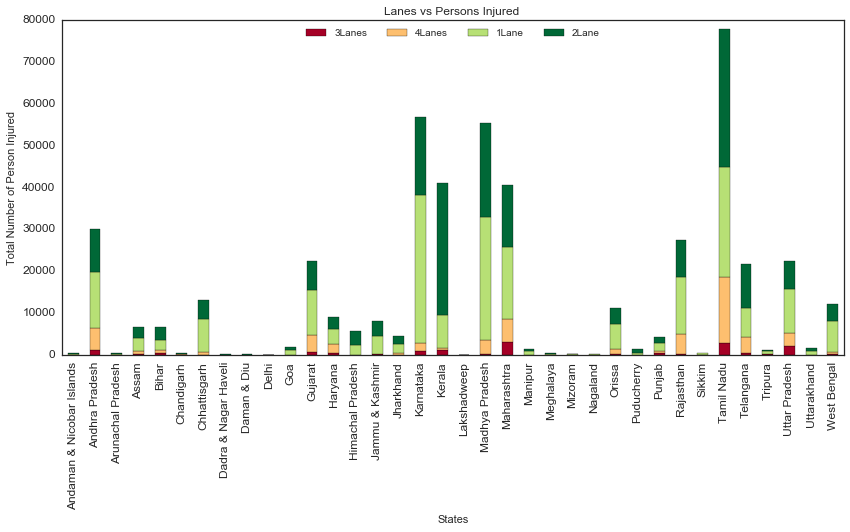

In [117]:
#Visualize number of persons injured for each state
cmap = cm.get_cmap('RdYlGn') # Colour map (there are many others)
lanes_plot = lanes_vs_injured_grp.unstack().plot(figsize=(14,6), kind='bar',stacked=True,title="Lanes vs Persons Injured ", fontsize='large',cmap=cmap)
lanes_plot.set_xlabel("States")
lanes_plot.set_ylabel("Total Number of Person Injured")
lanes_plot.legend(["3Lanes","4Lanes","1Lane","2Lane"], loc=9,ncol=4)

#ToDo
#Why can't we see any effect of sorting the points?